# LRP 

### Disable Debugging Tensorflow

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


### Imports

In [14]:
import keras.applications.xception as xc

tf.compat.v1.disable_eager_execution()
import innvestigate

import cv2
import numpy as np
import matplotlib.pyplot as plt

### Load Image

In [15]:
image_path = "data/tabby-cat.jpeg"
image = cv2.imread(image_path)

resized_image = cv2.resize(image, [299,299])
image = resized_image

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


### Model

In [16]:
model, preprocess, decode_predictions = xc.Xception(), xc.preprocess_input, xc.decode_predictions
model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 149, 149, 32)         864       ['input_2[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 149, 149, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 149, 149, 32)         0         ['block1_conv1_bn[0][0]

### Helper Function

In [5]:
def predictions_model(image, model):
    x = preprocess(image[None])
    predictions = model.predict(x)
    decoded_predictions = decode_predictions(predictions, top=5)[0]
    
    for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
        print(f"{i + 1}: {label} ({score:.2f})")

In [6]:
rule_list = ["lrp.sequential_preset_a","deep_taylor"]
num_rules = len(rule_list)

def analyze_image_lrp(image, model):
    fig, axes = plt.subplots(1, num_rules, figsize=(15, 3)) 
    model = innvestigate.model_wo_softmax(model)
    for i, rule in enumerate(rule_list):
        
        analyzer = innvestigate.create_analyzer(rule, model)
        
        x = preprocess(np.array(image)[None]) 
        
        a = analyzer.analyze(x)
        
        a = a.sum(axis=np.argmax(np.asarray(a.shape) == 3))
        a /= np.max(np.abs(a))
        ax = axes[i] if num_rules > 1 else axes
        ax.imshow(a[0], cmap="seismic", clim=(-1, 1))
        ax.set_title(rule)
        
    plt.tight_layout()
    plt.show()

In [7]:
def plot_numpy_array(array,title=''):
    array = cv2.cvtColor(array, cv2.COLOR_BGR2RGB)
    plt.imshow(array)
    plt.title(title)
    plt.savefig(title)
    plt.show()

### Use Analyzer and Plot

In [ ]:
plot_numpy_array(image,"Original Image")
predictions_model(image,model)

In [ ]:
analyze_image_lrp(image,model)

## Add Noise

In [8]:
np.random.seed(42)
noise = np.random.normal(0, 50, image.shape) 
noise_image = image + noise
noise_image = np.clip(noise_image, 0, 255).astype(np.uint8)

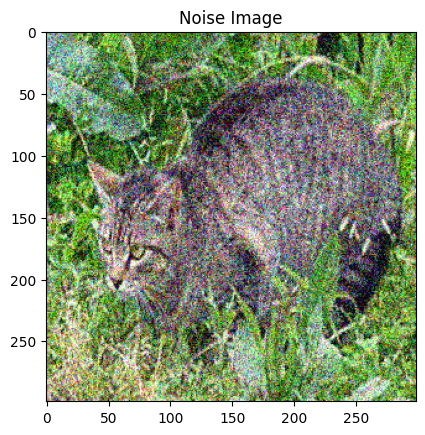

C:\Users\timBo\miniconda3\envs\DEEPL-Project\Lib\site-packages\keras\src\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


1: lynx (0.40)
2: hare (0.03)
3: Egyptian_cat (0.02)
4: tabby (0.02)
5: tiger_cat (0.02)


In [9]:
plot_numpy_array(noise_image,"Noise Image")
predictions_model(noise_image,model)

C:\Users\timBo\miniconda3\envs\DEEPL-Project\Lib\site-packages\innvestigate\backend\graph.py:467: UserWarning: Ignore dtype <dtype: 'float32'> as bias type.
  warnings.warn(f"Ignore dtype {dtype} as bias type.")
C:\Users\timBo\miniconda3\envs\DEEPL-Project\Lib\site-packages\innvestigate\backend\graph.py:480: UserWarning: Ignore dtype <dtype: 'float32'> as bias type.
  warnings.warn(f"Ignore dtype {dtype} as bias type.")
C:\Users\timBo\miniconda3\envs\DEEPL-Project\Lib\site-packages\tensorflow\python\client\session.py:1505: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  ret = tf_session.TF_SessionRunCallable(self._session._session,


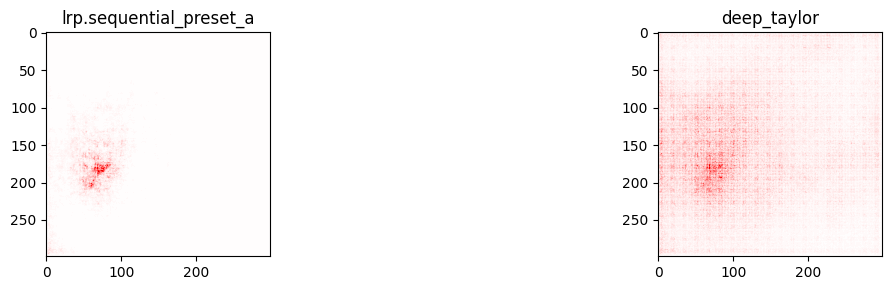

In [10]:
analyze_image_lrp(noise_image,model)

### Add Rotation

In [11]:
rotated_image = np.rot90(image)

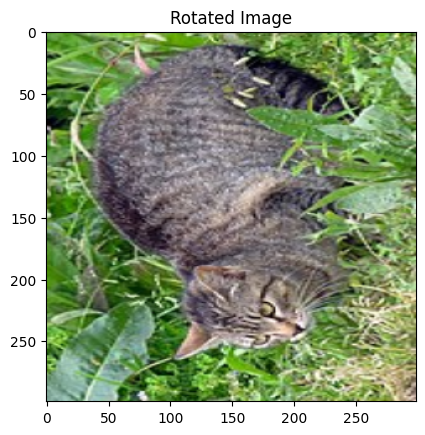

1: tiger_cat (0.27)
2: tabby (0.16)
3: lynx (0.14)
4: Egyptian_cat (0.01)
5: great_grey_owl (0.01)


In [12]:
plot_numpy_array(rotated_image,"Rotated Image")
predictions_model(rotated_image,model)

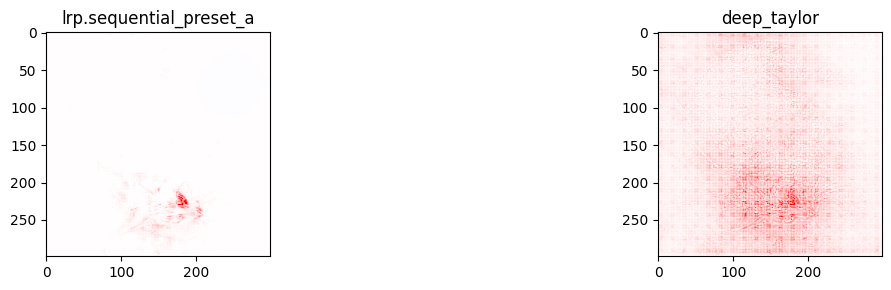

In [13]:
analyze_image_lrp(rotated_image,model)